In [1]:
!pip install spectral

     |████████████████████████████████| 215kB 5.6MB/s 


In [7]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.utils import np_utils
import sklearn
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import mean_squared_error, r2_score,classification_report
from sklearn.model_selection import train_test_split
import spectral
from spectral import principal_components,open_image
from matplotlib.pyplot import imshow
from sklearn.decomposition import PCA 
from spectral import create_training_classes,GaussianClassifier
from tensorflow.keras.models import load_model

In [5]:
X=loadmat(r'/content/drive/MyDrive/ANN project/Indian_pines_corrected.mat')['indian_pines_corrected']
Y=loadmat(r'/content/drive/MyDrive/ANN project/Indian_pines_gt.mat')['indian_pines_gt']

In [8]:
model = load_model(r'/content/drive/MyDrive/ANN project/indiana_pines_model_2.h5')

In [9]:
def Selecting_Patch(data,hi,wi):
    slice_h= slice(hi, hi+PATCH_SIZE)
    slice_w = slice(wi, wi+PATCH_SIZE)
    patch = data[slice_h, slice_w, :]
    return patch

In [10]:
print(X.shape,Y.shape)

(145, 145, 200) (145, 145)


In [11]:
pc = principal_components(X)
pc_0989 = pc.reduce(fraction=0.989)
img_pc = pc_0989.transform(X)

In [13]:
img_pc.shape

(145, 145, 24)

In [14]:
height = 145
width = 145

PATCH_SIZE = 25
numComponents = 24

In [17]:
def padding_with_zeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

In [18]:
X_padd = padding_with_zeros(img_pc, 12)

In [20]:
X_padd.shape

(169, 169, 24)

In [21]:
outputs = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        target = int(Y[i,j])
        if target == 0 :
            continue
        else :
            image_patch=Selecting_Patch(X_padd,i,j) #selecting patch around each pixel
            X_test_image = image_patch.reshape(1,image_patch.shape[0],image_patch.shape[1], image_patch.shape[2], 1).astype('float32')   #reshaping it
            prediction = (model.predict(X_test_image)) 
            prediction = np.argmax(prediction, axis=1)
            outputs[i][j] = prediction+1

ImageView object:
  Interpolation       :  <default>

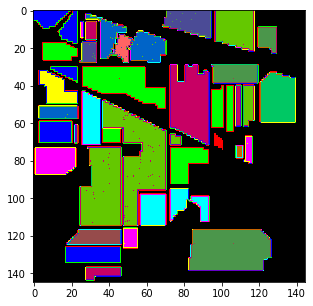

In [22]:
spectral.imshow(classes=Y.astype(int),figsize =(5,5))


ImageView object:
  Interpolation       :  <default>

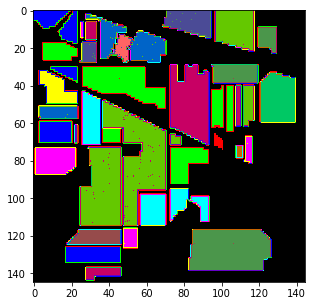

In [23]:
spectral.imshow(classes=outputs.astype(int),figsize =(5,5))

ImageView object:
  Interpolation       :  <default>

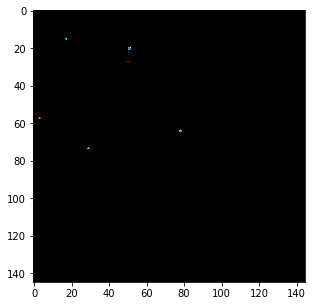

In [24]:
error=outputs*(outputs!=Y)
spectral.imshow(classes=error.astype(int),figsize =(5,5))